### עבודת סיום סטטיסטיקה וניתוח נתונים<br />
מגי דניאל <br />

## חלק א- מודל סטטיסטי

קובץ דאטה בייס <br />
https://www.kaggle.com/datasets/malaiarasugraj/e-commerce-dataset/data


###ספריות והצהרות

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # נרמול לטווח [0,1]
from sklearn.preprocessing import StandardScaler # סטנדרטיזציה
import matplotlib.pyplot as plt # לשרטוט גרפים
import seaborn as sns # לשרטוט גרפים
from scipy.stats import f_oneway, f #לביצוע מבחן אנובה
from statsmodels.stats.multicomp import pairwise_tukeyhsd #לביצוע מבחן טוקי
import json # להדפסה בפורמט גייסון

alpha=0.05 # רמת מובהקות

 CSV קריאת הנתונים מקובץ

In [ ]:
data = pd.read_csv('diversified_ecommerce_dataset.csv')
print(data.head())

  Product ID Product Name     Category    Price  Discount  Tax Rate  \
0      P6879       Jacket      Apparel    53.85         5        15   
1      P5132       Camera  Electronics   761.26        10        15   
2      P2941     Sneakers     Footwear  1756.76         5         8   
3      P8545    Cookbooks        Books   295.24        10        15   
4      P4594       Camera  Electronics   832.00        10        12   

   Stock Level Supplier ID Customer Age Group Customer Location  \
0          150        S535              35-44     New York, USA   
1          224        S583              25-34        London, UK   
2          468        S118              25-34      Tokyo, Japan   
3           25        S104              18-24     Paris, France   
4          340        S331                55+      Tokyo, Japan   

  Customer Gender  Shipping Cost Shipping Method  Return Rate Seasonality  \
0            Male          23.32        Standard         4.49         Yes   
1          Femal

# ניקוי וטיוב הנתונים

## 1- בדיקת ערכים חסרים

In [ ]:
print(data.isnull().sum())

Product ID            0
Product Name          0
Category              0
Price                 0
Discount              0
Tax Rate              0
Stock Level           0
Supplier ID           0
Customer Age Group    0
Customer Location     0
Customer Gender       0
Shipping Cost         0
Shipping Method       0
Return Rate           0
Seasonality           0
Popularity Index      0
dtype: int64


לא קיימים ערכים חסרים

 ## 2- איתור ערכים חריגים <br />
'Price', 'Stock Level', 'Shipping Cost', 'Discount', 'Return Rate', 'Tax Rate' לעמודות

In [ ]:
# BOXPLOT פונקציה שמציירת
def plot_boxplots(data_df, columns, title_prefix=''):

    if isinstance(columns, str):
        columns = [columns]

    for column in columns:
        if column in data_df.columns:
            plt.figure(figsize=(8, 4))
            sns.boxplot(data=data_df, x=column)
            plt.title(f'{title_prefix} {column}')
            plt.xlabel(column)
            plt.grid(True, axis='x', linestyle='--', alpha=0.5)
            plt.show()
        else:
            print(f'Column "{column}" not found in the DataFrame')

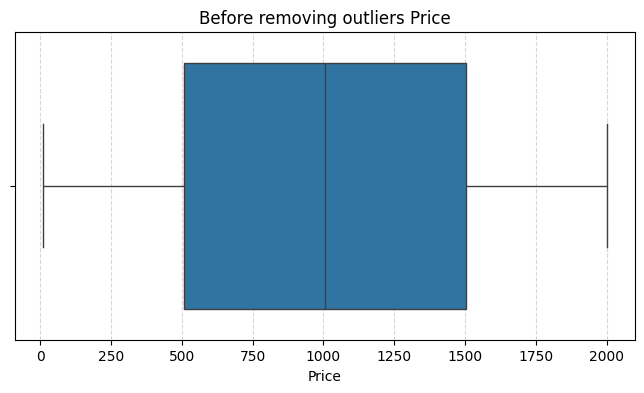

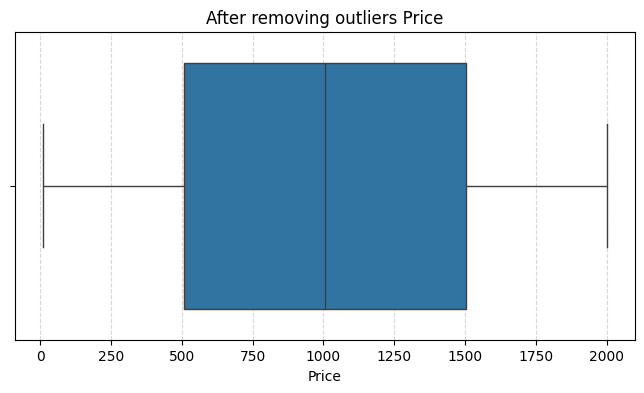

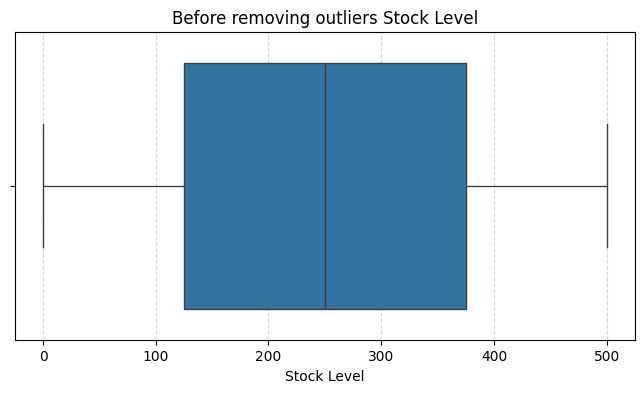

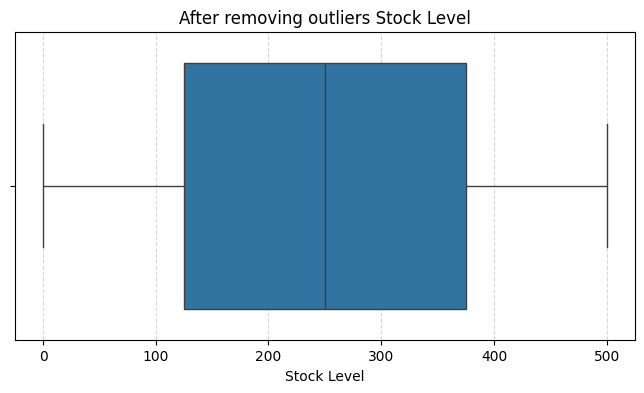

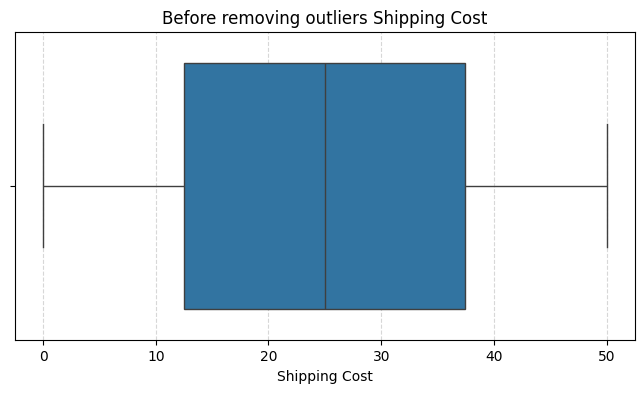

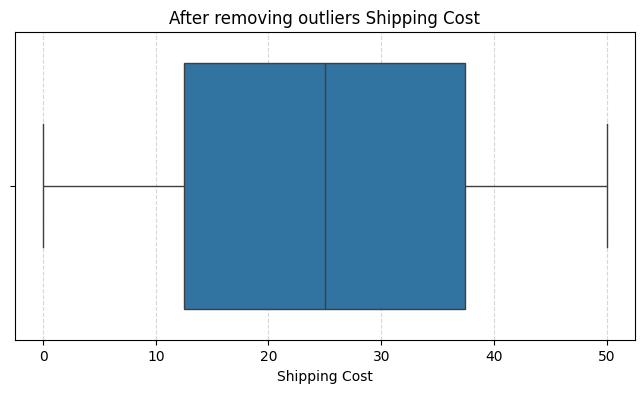

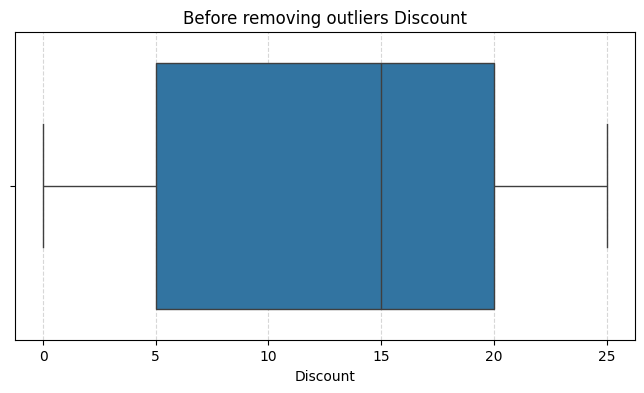

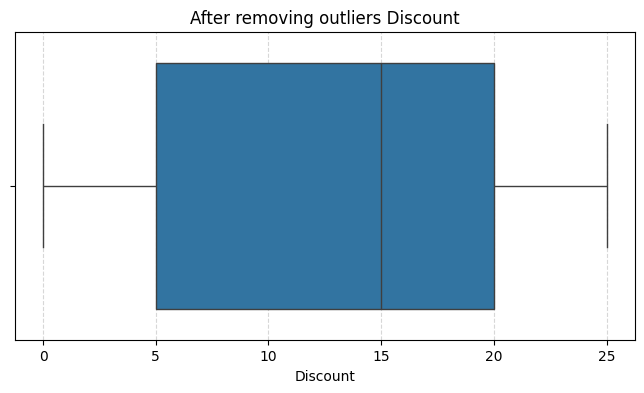

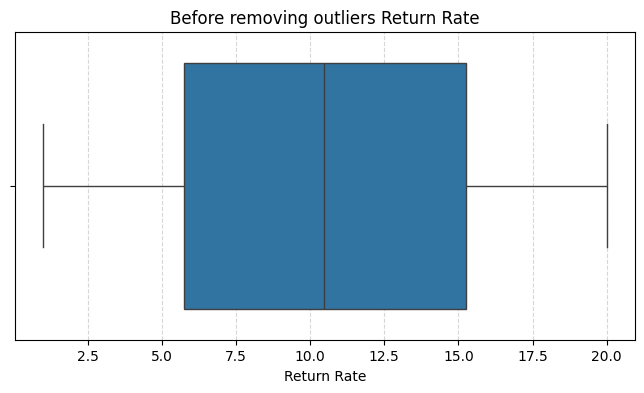

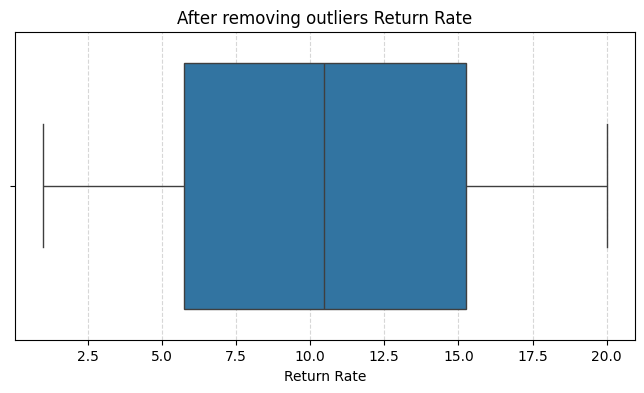

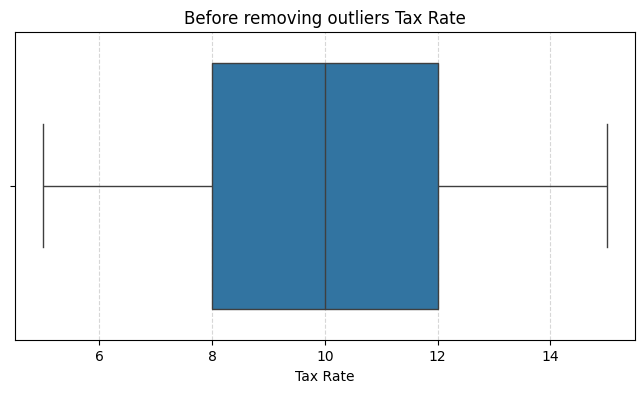

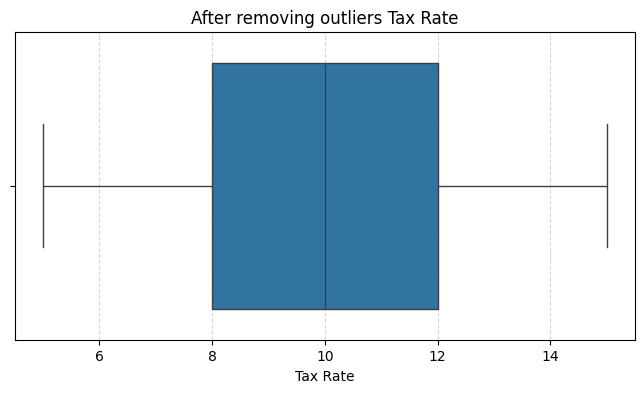

  Product ID Product Name     Category    Price  Discount  Tax Rate  \
0      P6879       Jacket      Apparel    53.85         5        15   
1      P5132       Camera  Electronics   761.26        10        15   
2      P2941     Sneakers     Footwear  1756.76         5         8   
3      P8545    Cookbooks        Books   295.24        10        15   
4      P4594       Camera  Electronics   832.00        10        12   

   Stock Level Supplier ID Customer Age Group Customer Location  \
0          150        S535              35-44     New York, USA   
1          224        S583              25-34        London, UK   
2          468        S118              25-34      Tokyo, Japan   
3           25        S104              18-24     Paris, France   
4          340        S331                55+      Tokyo, Japan   

  Customer Gender  Shipping Cost Shipping Method  Return Rate Seasonality  \
0            Male          23.32        Standard         4.49         Yes   
1          Femal

In [ ]:
# פונקציה שמסירה חריגים ומשאירה רק ערכים בטווח התקין
def remove_outliers(data_df, columns_to_check):
    data_clean = data_df.copy()

    for column in columns_to_check:
        if column in data_clean.columns:  # מוודאים שהעמודה קיימת ב-DataFrame

            #הצגת Boxplot לפני הסרת חריגים
            plot_boxplots(data_clean, column, title_prefix='Before removing outliers')

            # איתור ערכים חריגים באמצעות חישוב רבעונים
            Q1 = data_clean[column].quantile(0.25)
            Q3 = data_clean[column].quantile(0.75)
            IQR = Q3 - Q1

            # גבולות לזיהוי ערכים חריגים
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # סינון הערכים החריגים, משאירים רק ערכים בטווח התקין
            data_clean = data_clean[(data_clean[column] >= lower_bound) & (data_clean[column] <= upper_bound)]

            # הצגת Boxplot אחרי הסרת חריגים
            plot_boxplots(data_clean, column, title_prefix='After removing outliers')

    return data_clean


# רשימת עמודות לבדיקה
columns_to_filter = ['Price', 'Stock Level', 'Shipping Cost', 'Discount', 'Return Rate', 'Tax Rate']
# שמירת הנתונים לאחר סינון חריגים בעמודות שנבחרו
data_clean = remove_outliers(data, columns_to_filter)
print(data_clean.head())

 אחרי הוצאת חריגים ולפני נרמול</br>
 PRICE חישוב ממוצע וחציון ל


Price
ממוצע: 1005.12
חציון: 1005.43
סטיית תקן: 574.45
מקסימום: 2000.00
מינימום: 10.00


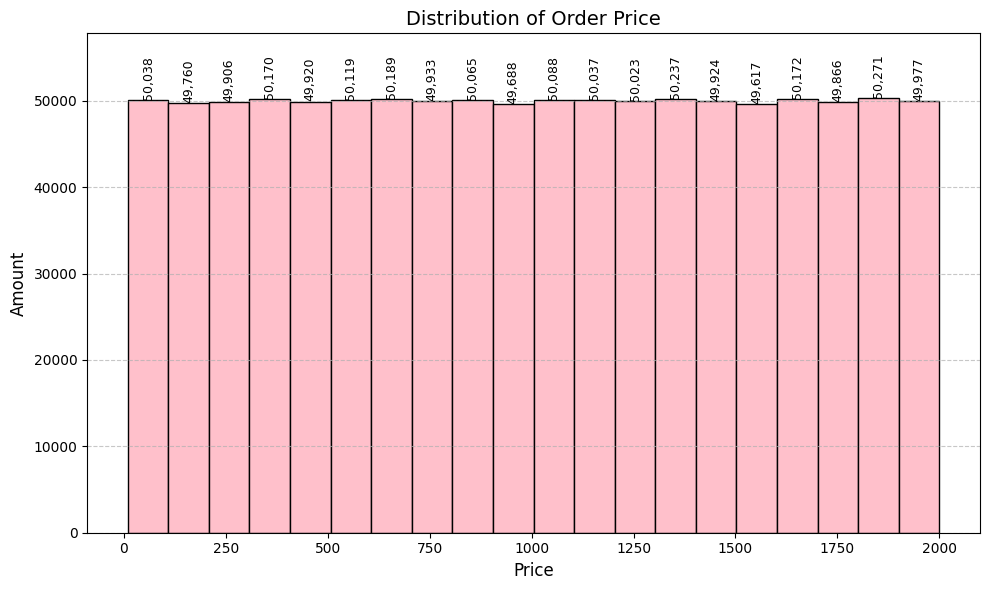

In [ ]:
#אחרי הוצאת חריגים ולפני נרמול הדאטה
print("Price")
print("ממוצע:","{:.2f}".format(data_clean["Price"].mean()))
print("חציון:", "{:.2f}".format(data_clean["Price"].median()))
print("סטיית תקן:","{:.2f}".format( data_clean["Price"].std()))
print("מקסימום:","{:.2f}".format(data_clean["Price"].max()))
print("מינימום:","{:.2f}".format(data_clean["Price"].min()))

#היסטוגרמה

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(data_clean["Price"], bins=20, color='pink', edgecolor='black')
plt.ylim(top=max(counts) * 1.15)

# הוספת מספרים מעל כל עמודה – עם פסיקים ובאנכית
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    plt.text(
        (bin_left + bin_right) / 2,
        count + 0.5,
        f"{int(count):,}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90,
        color='black'
    )

# תוויות וציר
plt.xlabel("Price", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.title("Distribution of Order Price", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3- המרת סוגי הנתונים

In [ ]:
print(data_clean.dtypes)

Product ID             object
Product Name           object
Category               object
Price                 float64
Discount                int64
Tax Rate                int64
Stock Level             int64
Supplier ID            object
Customer Age Group     object
Customer Location      object
Customer Gender        object
Shipping Cost         float64
Shipping Method        object
Return Rate           float64
Seasonality            object
Popularity Index        int64
dtype: object


כל הנתונים שלנו הם בפורמט הנכון, כולל עמודת הגיל. מכיוון שהגיל הוא טווח מספרים ולא גיל מסויים של לקוח.

## 4- נרמול וסטנדרטיזציה של נתונים

In [ ]:
# סופר את כמות הערכים בלי הכפולים
unique_counts = data_clean.nunique()
print(unique_counts)

Product ID              9000
Product Name              43
Category                   5
Price                 197715
Discount                   6
Tax Rate                   5
Stock Level              501
Supplier ID              900
Customer Age Group         5
Customer Location         15
Customer Gender            3
Shipping Cost           5001
Shipping Method            3
Return Rate             1901
Seasonality                2
Popularity Index         101
dtype: int64


### א. ביצוע נרמול לטווח ערכים  <br />
 Discount, Tax Rate לערכים <br />
מכיוון שיש להם טווח ערכים קטן יחסית

In [ ]:
scaler = MinMaxScaler()
data_clean[['Discount', 'Tax Rate']] = scaler.fit_transform(data_clean[['Discount', 'Tax Rate']])

 ### ב. ביצוע סטנדרטיזציה לערכים<br />
Price, Stock Level, Shiping Cost, Return Rate <br />
מכיוון שיש להם טווח ערכים גדול יחסית

In [ ]:
scaler = StandardScaler()
data_clean[['Price', 'Stock Level', 'Shipping Cost','Return Rate']] = scaler.fit_transform(data_clean[['Price', 'Stock Level', 'Shipping Cost', 'Return Rate']])

In [ ]:
print(data_clean.head())

  Product ID Product Name     Category     Price  Discount  Tax Rate  \
0      P6879       Jacket      Apparel -1.655965       0.2       1.0   
1      P5132       Camera  Electronics -0.424511       0.4       1.0   
2      P2941     Sneakers     Footwear  1.308448       0.2       0.3   
3      P8545    Cookbooks        Books -1.235755       0.4       1.0   
4      P4594       Camera  Electronics -0.301367       0.4       0.7   

   Stock Level Supplier ID Customer Age Group Customer Location  \
0    -0.691396        S535              35-44     New York, USA   
1    -0.179909        S583              25-34        London, UK   
2     1.506616        S118              25-34      Tokyo, Japan   
3    -1.555394        S104              18-24     Paris, France   
4     0.621882        S331                55+      Tokyo, Japan   

  Customer Gender  Shipping Cost Shipping Method  Return Rate Seasonality  \
0            Male      -0.115386        Standard    -1.094451         Yes   
1         

עד כאן ניקוי וטיוב הנתונים
## שלבי עבודה

### 1- בחירת משתנה תלוי ומשתנים מסבירים <br />
Price = משתנה תלוי- סכום ההזמנה <br />
Customer Gender = משתנים מסבירים- מגדר <br />
Customer Age Group = גיל <br />
Customer Location = אזור מגורים <br />
Category = קטגוריית מוצר<br />

### 2- ניסוח שאלת המחקר
?כיצד משתנים דמוגרפיים כגון גיל, מגדר, איזור מגורים, קטגוריית מוצר משפיעים על המשתנה התלוי (סכום ההזמנה)

### 3- חישוב סטטיסטיקה תיאורית
* סכום ההזמנה= Price

Price
ממוצע: -0.00
חציון: 0.00
סטיית תקן: 1.00
מקסימום: 1.73
מינימום: -1.73


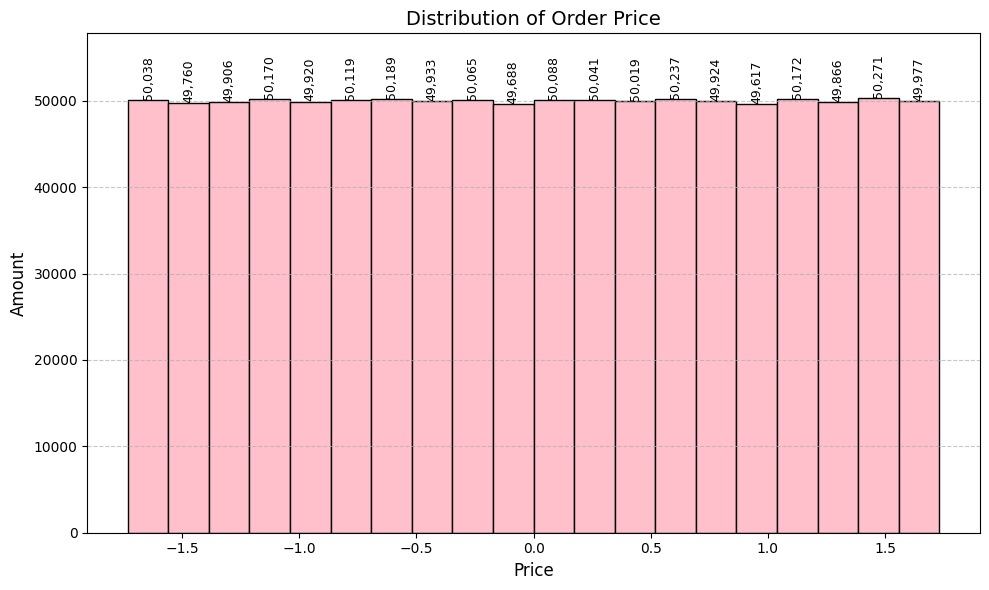

In [ ]:
print("Price")
print("ממוצע:","{:.2f}".format(data_clean["Price"].mean()))
print("חציון:", "{:.2f}".format(data_clean["Price"].median()))
print("סטיית תקן:","{:.2f}".format( data_clean["Price"].std()))
print("מקסימום:","{:.2f}".format(data_clean["Price"].max()))
print("מינימום:","{:.2f}".format(data_clean["Price"].min()))

#היסטוגרמה

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(data_clean["Price"], bins=20, color='pink', edgecolor='black')
plt.ylim(top=max(counts) * 1.15)

# הוספת מספרים מעל כל עמודה – עם פסיקים ובאנכית
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    plt.text(
        (bin_left + bin_right) / 2,
        count + 0.5,
        f"{int(count):,}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90,
        color='black'
    )

# תוויות וציר
plt.xlabel("Price", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.title("Distribution of Order Price", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

פונקציה שמשרטטת גרפים קטגוריאליים

In [ ]:
def draws_categorical_graph(df, column):
  plt.figure(figsize=(8,10))
  ax = sns.countplot(data=df, x= column, order=df[column].value_counts().index, color='pink', width= 0.8)
  # סופר כמה יש מכל ערך
  values_plot = df[column].value_counts(ascending=False).values
  # הוספת תגיות עם מספרים בפורמט עם פסיקים
  ax.bar_label(container=ax.containers[0], labels=[f'{int(value):,}' for value in values_plot], padding=4, fontsize=8, rotation=30)
  # משרטט את הגרף
  plt.title(f"Distribution of {column}")
  plt.xticks(rotation=45)
  plt.show()

* Customer Gender =  מגדר

In [ ]:
# הערכים שיש בעמודת המגדר
data_clean['Customer Gender'].unique()

array(['Male', 'Female', 'Non-Binary'], dtype=object)

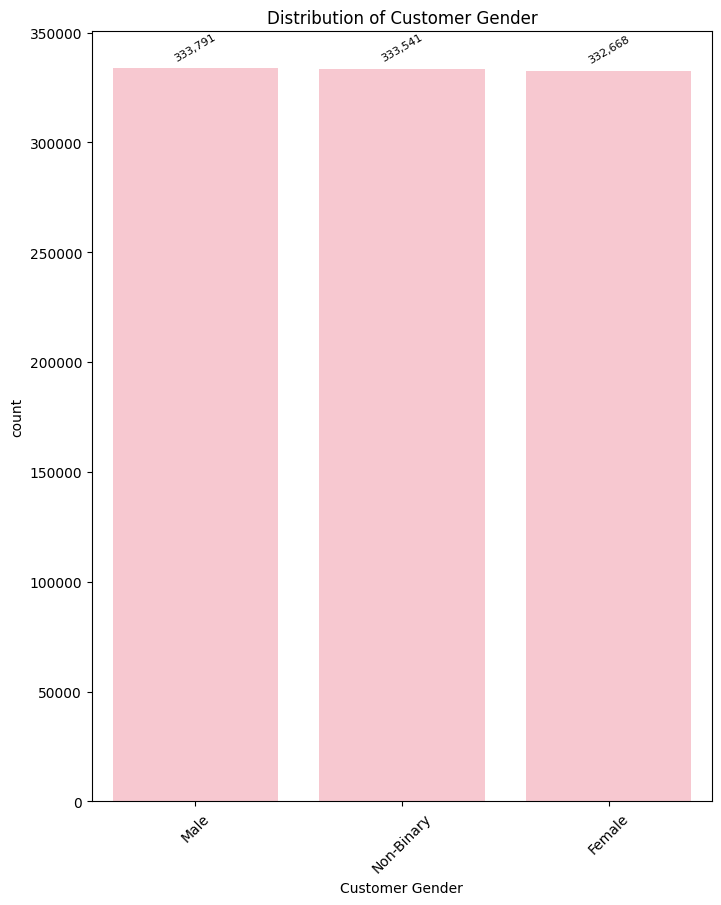

In [ ]:
#שרטוט הגרף של המגדר
draws_categorical_graph(data_clean, "Customer Gender")

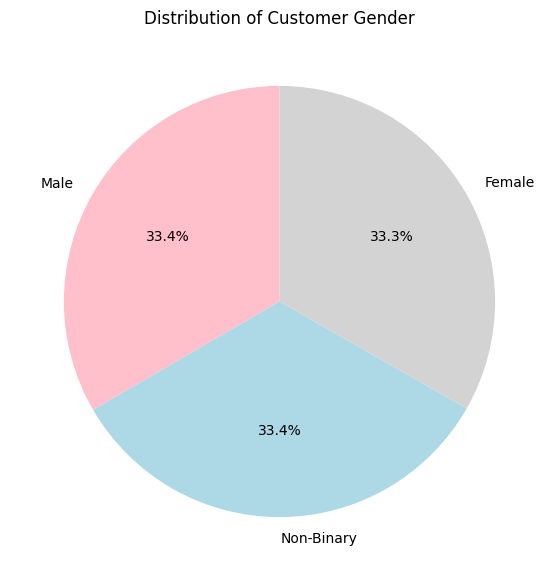

In [ ]:
# יצירת גרף Pie Chart עבור "Customer Gender"
gender_counts = data_clean["Customer Gender"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'lightblue', 'lightgray'], startangle=90)
plt.title('Distribution of Customer Gender')
plt.show()

* Customer Age Group = גיל

In [ ]:
# הערכים שיש בעמודת הגיל
data_clean['Customer Age Group'].unique()

array(['35-44', '25-34', '18-24', '55+', '45-54'], dtype=object)

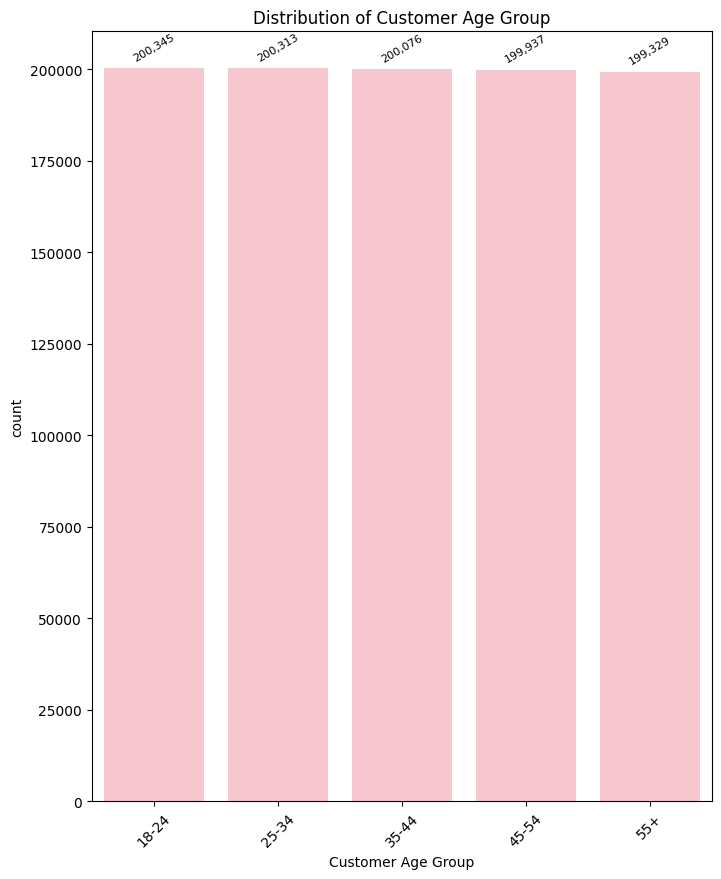

In [ ]:
# שרטוט הגרף של הגיל
draws_categorical_graph(data_clean, "Customer Age Group")

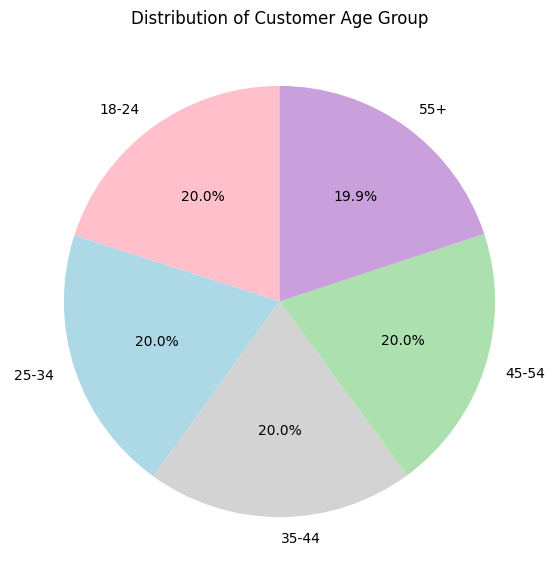

In [ ]:
# יצירת גרף Pie Chart עבור "Customer Age Group"
gender_counts = data_clean["Customer Age Group"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'lightblue', 'lightgray','#ACE1AF','#C9A0DC'], startangle=90)
plt.title('Distribution of Customer Age Group')
plt.show()

* Customer Location = איזור מגורים

In [ ]:
# הערכים שיש בעמודת האיזור מגורים
data_clean['Customer Location'].unique()

array(['New York, USA', 'London, UK', 'Tokyo, Japan', 'Paris, France',
       'Singapore', 'Sydney, Australia', 'Phoenix, USA',
       'Cape Town, South Africa', 'Houston, USA', 'Toronto, Canada',
       'Chicago, USA', 'Berlin, Germany', 'Dubai, UAE', 'Mumbai, India',
       'Los Angeles, USA'], dtype=object)

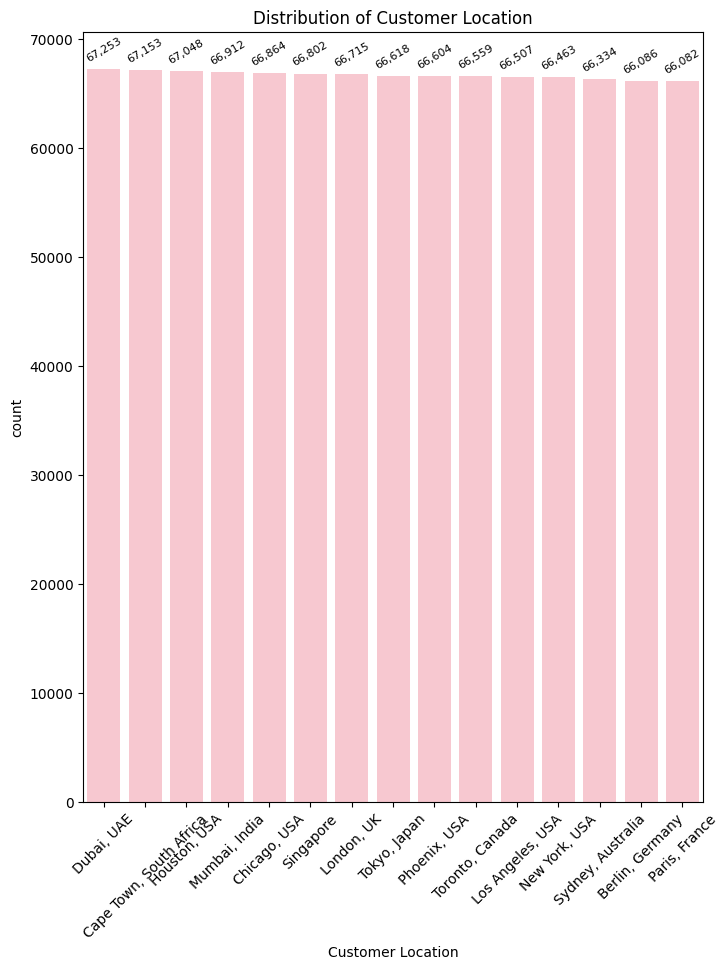

In [ ]:
#שרטוט הגרף של איזור המגורים
draws_categorical_graph(data_clean, "Customer Location")

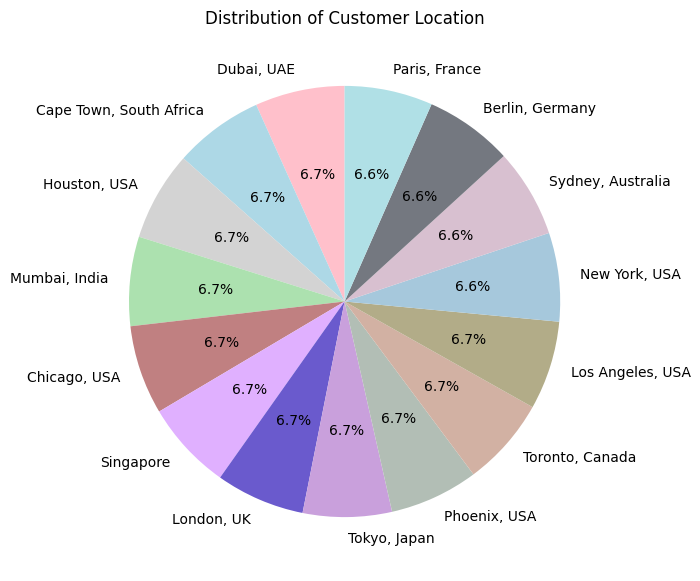

In [ ]:
# יצירת גרף Pie Chart עבור "Customer Location"
gender_counts = data_clean["Customer Location"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'lightblue', 'lightgray','#ACE1AF','#C08081','#E0B0FF','#6A5ACD','#C9A0DC','#B2BEB5','#D2B1A3','#B2AC88','#A6C8DC','#D8C0D0','#747880','#B0E0E6'], startangle=90)
plt.title('Distribution of Customer Location')
plt.show()

* Category = קטגוריית מוצר

In [ ]:
# הערכים שיש בעמודת הקטגוריה
data_clean['Category'].unique()

array(['Apparel', 'Electronics', 'Footwear', 'Books', 'Home Appliances'],
      dtype=object)

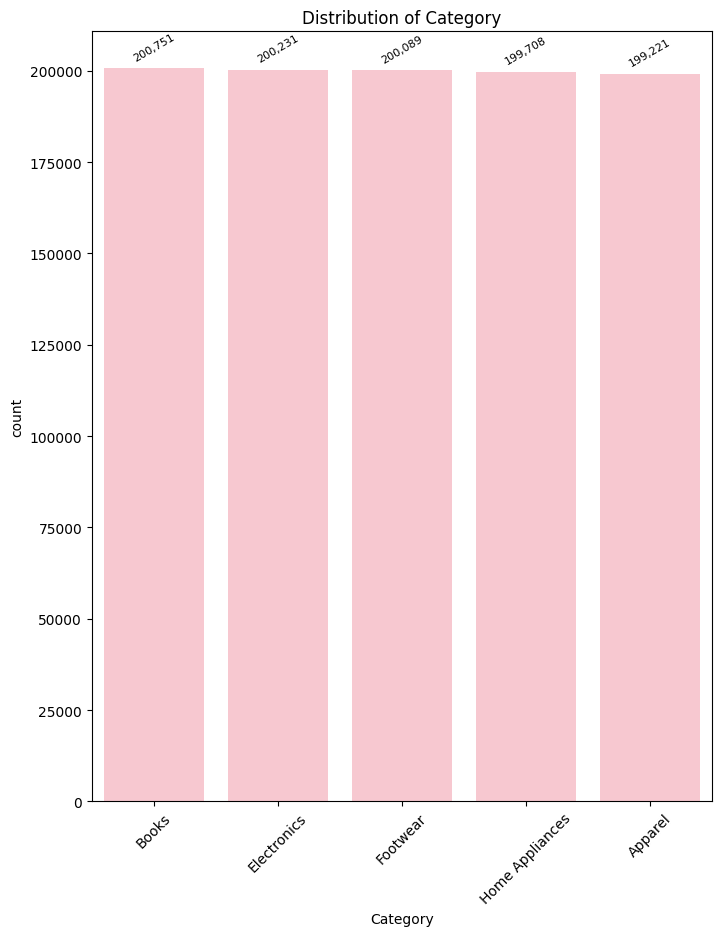

In [ ]:
#שרטוט הגרף של הקטגוריה
draws_categorical_graph(data_clean, "Category")

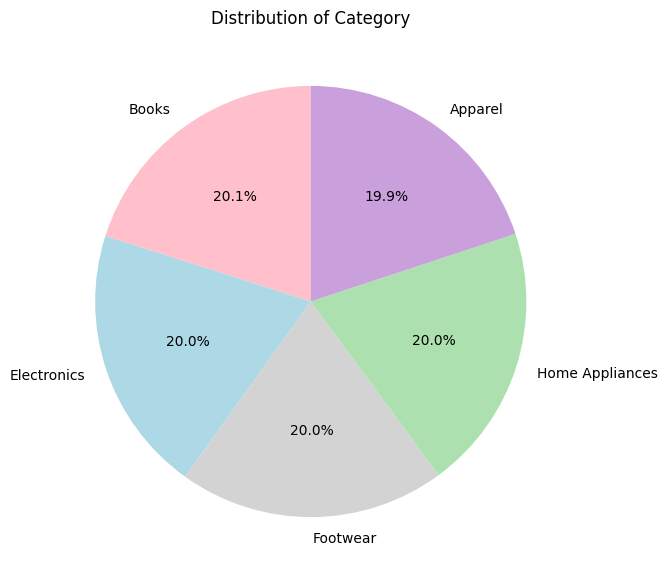

In [ ]:
# יצירת גרף Pie Chart עבור "Category"
gender_counts = data_clean["Category"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'lightblue', 'lightgray','#ACE1AF','#C9A0DC' ], startangle=90)
plt.title('Distribution of Category')
plt.show()

### 4- בדיקת קשרים בין משתנים
מכיוון שהמשתנה התלוי שלי שהוא סכום ההזמנה הוא נומרי והמשתנים המסבירים שלי הם קטגוריאליים אז לא אשתמש במקדם פירסון כדי לבדוק את הקשר בין המשתנים.
 אבדוק את הקשר בין המשתנים באמצעות מבחן אנובה חד כיווני מכיוון שהמשתנים הקטגוריאליים המסבירים שבחרתי כוללים יותר משתי קבוצות בכל קטגוריה
(One-Way ANOVA)

מקדם פרסון מודד את הקשר הלינארי בין שני משתנים כמותיים-רציפים ולכן לא מתאים כאן.

In [ ]:
# פונקציה שמבצעת את מבחן ANOVA
#מבצע מבחן ANOVA חד כיווני על משתנה כמותי אחד לפי משתנה קטגורי
# מחזירה את תוצאות המבחן והאם יש צורך במבחן טוקי
def anova_test(df, numeric_column, category_column):

    groups = [df[df[category_column] == category][numeric_column].values for category in df[category_column].unique()]
    f_stat, p_value = f_oneway(*groups)
    df_between = len(groups) - 1  # K-1
    df_within = len(df) - len(groups)  # N-K
    f_critical = f.ppf(1 - alpha, df_between, df_within)

    return {
        "f_stat": f_stat,
        "p_value": p_value,
        "f_critical": f_critical,
        "df_between": df_between,
        "df_within": df_within,
        "reject_h0": f_stat > f_critical
    }

In [ ]:
# חישוב טבלת תוצאות של מבחן ANOVA
def calculate_anova_table(df, numeric_column, category_column, anova_results):

    overall_mean = df[numeric_column].mean()
    categories = df[category_column].unique()
    SSB = sum(len(df[df[category_column] == category]) * (df[df[category_column] == category][numeric_column].mean() - overall_mean) ** 2 for category in categories)
    SSW = sum(((df[df[category_column] == category][numeric_column] - df[df[category_column] == category][numeric_column].mean()) ** 2).sum() for category in categories)
    SST = SSB + SSW

    MSB = SSB / anova_results["df_between"]
    MSE = SSW / anova_results["df_within"]

    return pd.DataFrame({
        "Source of Variation": ["Between Groups", "Within Groups", "Total"],
        "DF": [anova_results["df_between"], anova_results["df_within"], anova_results["df_between"] + anova_results["df_within"]],
        "Sum of Squares (SS)": [SSB, SSW, SST],
        "Mean Square (MS)": [MSB, MSE, ""],
        "F": [anova_results["f_stat"], "", ""],
        "F Critical": [anova_results["f_critical"], "", ""]
    })

In [ ]:
#בדיקה לחישוב מבחן טוקי
def tukey_test_calculation_test(df, numeric_column, category_column,anova_results):
  if anova_results["reject_h0"]:
      print(f"דוחים את H0: יש הבדל משמעותי בין המשתנים(p-value = {anova_results['p_value']:.4f}).")
      # מבחן טוקי
      tukey_results = pairwise_tukeyhsd(df[numeric_column], df[category_column], alpha=alpha)
      print("תוצאות מבחן טוקי: \n")
      print(tukey_results)
  else:
      print(f"לא דוחים את H0: אין הבדל משמעותי בין המשתנים(p-value = {anova_results['p_value']:.4f}).")

### נבדוק את הקשר בין סכום ההזמנה למגדר <br/>
### Price VS Customer Gender

In [ ]:
#ביצוע מבחן אנובה
anova_results = anova_test(data_clean, "Price", "Customer Gender")
print("ביצוע מבחן אנובה\n", json.dumps(anova_results,default=str, indent=4))

ביצוע מבחן אנובה
 {
    "f_stat": 1.218249709947851,
    "p_value": 0.2957477965451476,
    "f_critical": 2.995741247224083,
    "df_between": 2,
    "df_within": 999997,
    "reject_h0": "False"
}


In [ ]:
#חישוב טבלת תוצאות של מבחן אנובה
anova_table = calculate_anova_table(data_clean, "Price", "Customer Gender", anova_results)
print("חישוב טבלת תוצאות של מבחן אנובה\n",anova_table)

חישוב טבלת תוצאות של מבחן אנובה
   Source of Variation      DF  Sum of Squares (SS) Mean Square (MS)        F  \
0      Between Groups       2         2.436501e+00          1.21825  1.21825   
1       Within Groups  999997         9.999976e+05         1.000001            
2               Total  999999         1.000000e+06                             

  F Critical  
0   2.995741  
1             
2             


In [ ]:
#בדיקה וביצוע של מבחן טוקי
tukey_test_calculation_test(data_clean, "Price", "Customer Gender", anova_results)

לא דוחים את H0: אין הבדל משמעותי בין המשתנים(p-value = 0.2957).


### מסקנות
**1-** P-value = 0.2957 > 0.05 = alpha </br>
H0 גדול מרמת מובהקות המקובלת לא דוחים את P-value מכיוון ש </br>
כלומר, אין עדות סטטיסטית לכך שסכום ההזמנה שונה באופן מובהק בין מגדרים שונים.  (סכום ההזמנה)ולכן אין קשר חזק למשתנה התלוי


**2-** כדי לבדוק האם כיוון הקשר הוא חיובי או שלילי</br>
 נחשב ממוצעי סכום הזמנה לכל מגדר</br>
אם הממוצע של סכום ההזמנה גבוה יותר עבור מגדר מסויים, אפשר לומר שיש קשר חיובי בין מגדר זה לסכום ההזמנה, ולהיפך אם נמוך יותר

In [ ]:
# ממוצע בין מגדר לסכום ההזמנה
print(data_clean.groupby("Customer Gender")["Price"].mean())

Customer Gender
Female       -0.002205
Male          0.001240
Non-Binary    0.000958
Name: Price, dtype: float64


מכאן אנחנו רואים כי קיים קשר שלילי בין אישה לסכום ההזמנה<br/>
וקיים קשר חיובי בין גברים ולא בינארי לסכום ההזמנה<br/>
כלומר, גברים ולא בינארי מזמינים בסכומים יותר גדולים מנשים  <br/>
בנוסף, ההשפעה מאוד קטנה מכיוון שההבדלים קרובים ל-0, נראה שהמגדר לא משפיע משמעותית על סכום ההזמנה

### נבדוק את הקשר בין סכום ההזמנה לגיל <br/>
### Price VS Customer Age Group

In [ ]:
#ביצוע מבחן אנובה
anova_results = anova_test(data_clean, "Price", "Customer Age Group")
print("ביצוע מבחן אנובה\n", json.dumps(anova_results,default=str, indent=4))

ביצוע מבחן אנובה
 {
    "f_stat": 0.456696042970615,
    "p_value": 0.7675785223345684,
    "f_critical": 2.37194113937568,
    "df_between": 4,
    "df_within": 999995,
    "reject_h0": "False"
}


In [ ]:
#חישוב טבלת תוצאות של מבחן אנובה
anova_table = calculate_anova_table(data_clean, "Price", "Customer Age Group", anova_results)
print("חישוב טבלת תוצאות של מבחן אנובה\n",anova_table)

חישוב טבלת תוצאות של מבחן אנובה
   Source of Variation      DF  Sum of Squares (SS) Mean Square (MS)         F  \
0      Between Groups       4              1.82679         0.456697  0.456696   
1       Within Groups  999995         999998.17321         1.000003             
2               Total  999999        1000000.00000                              

  F Critical  
0   2.371941  
1             
2             


In [ ]:
#בדיקה וביצוע של מבחן טוקי
tukey_test_calculation_test(data_clean, "Price", "Customer Age Group", anova_results)

לא דוחים את H0: אין הבדל משמעותי בין המשתנים(p-value = 0.7676).


### מסקנות
**1-** P-value = 0.76757 > 0.05 = alpha </br>
H0 גדול מרמת מובהקות המקובלת לא דוחים את P-value מכיוון ש </br>
כלומר, אין עדות סטטיסטית לכך שסכום ההזמנה שונה באופן מובהק בין קבוצות הגילאים השונות. ולכן אין קשר חזק למשתנה התלוי
(סכום ההזמנה)

**2-** כדי לבדוק האם כיוון הקשר הוא חיובי או שלילי</br>
 נחשב ממוצעי סכום הזמנה לכל קבוצת גיל</br>
אם הממוצע של סכום ההזמנה גבוה יותר עבור קבוצת גיל מסויימת, אפשר לומר שיש קשר חיובי בין קבוצת הגיל לסכום ההזמנה, ולהיפך אם נמוך

In [ ]:
# ממוצע בין טווח גילאים לסכום ההזמנה
print(data_clean.groupby("Customer Age Group")["Price"].mean())

Customer Age Group
18-24    0.000018
25-34    0.002378
35-44   -0.000413
45-54   -0.000182
55+     -0.001811
Name: Price, dtype: float64


מכאן אנחנו רואים כי קיים קשר שלילי בין קבוצות הגיל שגדולות מגיל 35 לסכום ההזמנה<br/>
וקיים קשר חיובי בין קבוצות הגילאים שקטנות מגיל 35 לסכום ההזמנה<br/>
כלומר, אנשים מתחת לגיל 35 מזמינים בסכומים יותר גדולים מאנשים מעל גיל 35  <br/>
בנוסף, ההשפעה מאוד קטנה מכיוון שההבדלים קרובים ל-0, נראה שקבוצות הגיל לא משפיעות משמעותית על סכום ההזמנה

### נבדוק את הקשר בין סכום ההזמנה לאזור מגורים <br/>
### Price VS Customer Location

In [ ]:
#ביצוע מבחן אנובה
anova_results = anova_test(data_clean, "Price", "Customer Location")
print("ביצוע מבחן אנובה\n", json.dumps(anova_results,default=str, indent=4))

ביצוע מבחן אנובה
 {
    "f_stat": 2.24380022323986,
    "p_value": 0.004850649471975933,
    "f_critical": 1.6917806915797202,
    "df_between": 14,
    "df_within": 999985,
    "reject_h0": "True"
}


In [ ]:
#חישוב טבלת תוצאות של מבחן אנובה
anova_table = calculate_anova_table(data_clean, "Price", "Customer Location", anova_results)
print("חישוב טבלת תוצאות של מבחן אנובה\n",anova_table)

חישוב טבלת תוצאות של מבחן אנובה
   Source of Variation      DF  Sum of Squares (SS) Mean Square (MS)       F  \
0      Between Groups      14         3.141269e+01         2.243763  2.2438   
1       Within Groups  999985         9.999686e+05         0.999984           
2               Total  999999         1.000000e+06                            

  F Critical  
0   1.691781  
1             
2             


In [ ]:
#בדיקה וביצוע של מבחן טוקי
tukey_test_calculation_test(data_clean, "Price", "Customer Location", anova_results)

דוחים את H0: יש הבדל משמעותי בין המשתנים(p-value = 0.0049).
תוצאות מבחן טוקי: 

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------
        Berlin, Germany Cape Town, South Africa   0.0017    1.0 -0.0169  0.0202  False
        Berlin, Germany            Chicago, USA   0.0138  0.427 -0.0048  0.0324  False
        Berlin, Germany              Dubai, UAE   0.0052 0.9998 -0.0134  0.0238  False
        Berlin, Germany            Houston, USA   0.0097 0.9118 -0.0089  0.0283  False
        Berlin, Germany              London, UK   0.0114  0.748 -0.0072    0.03  False
        Berlin, Germany        Los Angeles, USA   0.0074 0.9913 -0.0112   0.026  False
        Berlin, Germany           Mumbai, India   0.0101 0.8825 -0.0085  0.0287  False
        Berlin, Germany           New York, USA  -

### מסקנות
**1-** P-value = 0.0048 < 0.05 = alpha </br>
H0 קטן מרמת מובהקות המקובלת דוחים את P-value מכיוון ש </br>
כלומר, יש עדות סטטיסטית לכך שסכום ההזמנה שונה באופן מובהק בין אזורים שונים. ולכן יש קשר חזק למשתנה התלוי
(סכום ההזמנה)

  נרצה לראות איפה יש קשר חזק בין המשתנים הפנימיים- לפי הטבלה <br/>
 reject = True כלומר נרצה לראות איפה<br/>
 0.05 = alfha < p-adj = כלומר שרמת המובהקות <br/>

1- Chicago, USA - New York, USA (p-adj = 0.0185) <br/>
2- New York, USA - Phoenix, USA (p-adj = 0.039) <br/>
3- New York, USA - Singapore (p-adj = 0.0348) <br/>
4- New York, USA - Tokyo, Japan (p-adj = 0.0429) <br/>

**2-** כדי לבדוק האם כיוון הקשר הוא חיובי או שלילי</br>
  meandiff נסתכל על</br>

1- Chicago, USA - New York, USA (meandiff = -0.0202) <br/>
2- New York, USA - Phoenix, USA (meandiff = 0.019) <br/>
3- New York, USA - Singapore (meandiff = 0.0192) <br/>
4- New York, USA - Tokyo, Japan (meandiff = 0.0189) <br/>

יש קשר חיובי בין אזור המגורים למחיר בכמה מההשוואות, כלומר ככל שעוברים לאזור עם<br/>   חיובי meandiff<br/>
המחיר עולה. <br/>( Phoenix, Singapore ו-Tokyo- כגון),

יש קשר שלילי בין <br/>
Chicago ל-New York, <br/>
 Chicago ל New York  כלומר ככל שעוברים מ<br/> .
המחיר יורד

### נבדוק את הקשר בין סכום ההזמנה לקטגוריה <br/>
### Price VS Category

In [ ]:
#ביצוע מבחן אנובה
anova_results = anova_test(data_clean, "Price", "Category")
print("ביצוע מבחן אנובה\n", json.dumps(anova_results,default=str, indent=4))

ביצוע מבחן אנובה
 {
    "f_stat": 1.2480476630244561,
    "p_value": 0.28810049020793776,
    "f_critical": 2.37194113937568,
    "df_between": 4,
    "df_within": 999995,
    "reject_h0": "False"
}


In [ ]:
#חישוב טבלת תוצאות של מבחן אנובה
anova_table = calculate_anova_table(data_clean, "Price", "Category", anova_results)
print("חישוב טבלת תוצאות של מבחן אנובה\n",anova_table)

חישוב טבלת תוצאות של מבחן אנובה
   Source of Variation      DF  Sum of Squares (SS) Mean Square (MS)         F  \
0      Between Groups       4         4.992191e+00         1.248048  1.248048   
1       Within Groups  999995         9.999950e+05              1.0             
2               Total  999999         1.000000e+06                              

  F Critical  
0   2.371941  
1             
2             


In [ ]:
#בדיקה וביצוע של מבחן טוקי
tukey_test_calculation_test(data_clean, "Price", "Category", anova_results)

לא דוחים את H0: אין הבדל משמעותי בין המשתנים(p-value = 0.2881).


### מסקנות
**1-** P-value = 0.2881 > 0.05 = alpha </br>
H0 גדול מרמת מובהקות המקובלת לא דוחים את P-value מכיוון ש </br>
כלומר, אין עדות סטטיסטית לכך שסכום ההזמנה שונה באופן מובהק בין קטגוריות המוצר השונות. ולכן אין קשר חזק למשתנה התלוי
(סכום ההזמנה)

**2-** כדי לבדוק האם כיוון הקשר הוא חיובי או שלילי</br>
 נחשב ממוצעי סכום הזמנה לכל קטגוריית מוצר</br>
אם הממוצע של סכום ההזמנה גבוה יותר עבור קטגורית מוצר מסויימת, אפשר לומר שיש קשר חיובי בין הקטגוריה לסכום ההזמנה, ולהיפך אם נמוך

In [ ]:
# ממוצע בין קטגוריה לסכום ההזמנה
print(data_clean.groupby("Category")["Price"].mean())

Category
Apparel           -0.001346
Books              0.002508
Electronics        0.002513
Footwear          -0.003206
Home Appliances   -0.000486
Name: Price, dtype: float64


 Apparel, Footwear, Home Appliances מכאן אנחנו רואים כי קיים קשר שלילי בין <br/>
לסכום ההזמנה <br/>
 Electronics, Books וקיים קשר חיובי בין,<br/>
לסכום ההזמנה<br/>
בנוסף, ההשפעה מאוד קטנה מכיוון שההבדלים קרובים ל-0, נראה שהקטגוריה לא משפיע משמעותית על סכום ההזמנה  <br/>

### ?כיצד ניתן להשתמש בממצאים לשיפור חוויית המשתמש בפלטפורמה

1. *התאמת המלצות מחיר לפי מיקום* <br/>
אם ידוע שלמשתמשים מאזור מסוים יש נטייה לשלם יותר (למשל, סינגפור או טוקיו לעומת ניו יורק), ניתן להתאים את טווח המחירים להצעות המוצגות למשתמשים מאזורים שונים.

  ניתן להציע הנחות או מבצעים ייחודיים לאזורים שבהם המחיר הממוצע נמוך יותר כדי לעודד רכישה.

2. *התאמת תוכן ושיווק לפי מגמות אזוריות, גילאים ומגדר* <br/>
באזורים בהם המחיר גבוה יותר, ייתכן שכדאי להדגיש ערך מוסף של המוצר במקום מחיר נמוך.

  אפשר לייעד קמפיינים פרסומיים בהתאם: בניו יורק אפשר להציג מבצעים אטרקטיביים, בעוד שבטוקיו וסינגפור ניתן להתמקד בייחודיות המוצר.
  
  ניתן לייעד קמפניים פרסומיים לקבוצות הגיל שמעל גיל 35 ולהתמקד ביחודיות של המוצר לקבוצת גיל שלו.

  בנוסף ניתן לייעד קמפניים פרסומיים לפי מגדר ולהתמקד ביחודיות של כל מגדר ולהתאים לו את הפרסום המתאים

  (אציין כי ראינו כי בגיל ,מגדר וקטגוריה אין קשר מובהק למחיר ולכן כנראה ההשפעה של הפרסום תהיה קטנה)